<a href="https://colab.research.google.com/github/ayushi7503/DATA-SCIENCE/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install speechpy

In [ ]:
pip install scipy

In [ ]:
pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1240 sha256=a5d9b9a878a340e57293434f247b56d14c9dee5089887c64b62e016c9b0feffe
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [ ]:
pip install sounddevice

In [ ]:
pip install soundfile

In [ ]:
pip install matplotlib

In [ ]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=b4c9c951ddcce6b2a56e434f44c077dfc1ab6924280a0908349340fd58116ec9
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
from scipy.io import wavfile

In [ ]:
#german

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/de-translation.wav")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Shape of Signal: (22200,)
Signal Datatype: int16
Signal duration: 1.39 seconds


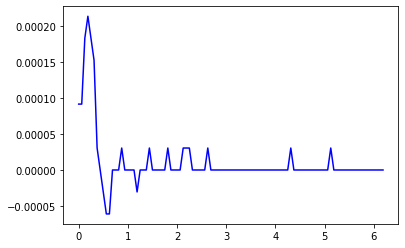

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


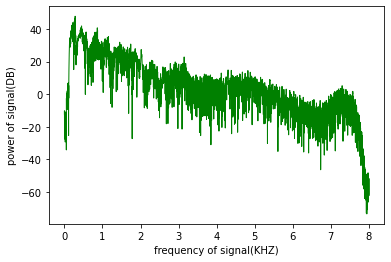

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


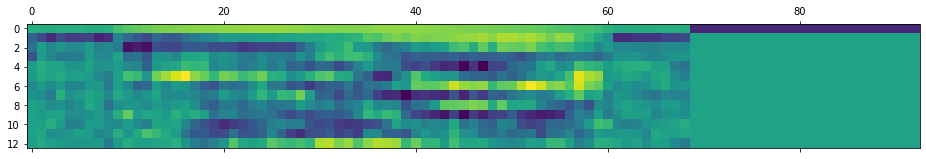

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/de-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


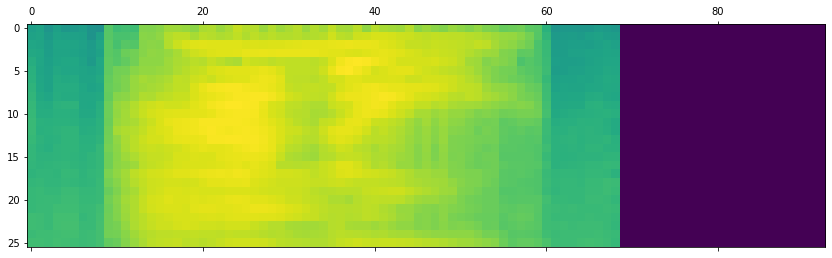

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()

In [ ]:
#english

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/en-translation.wav")


Shape of Signal: (23800,)
Signal Datatype: int16
Signal duration: 1.49 seconds


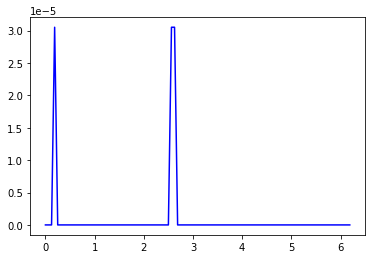

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


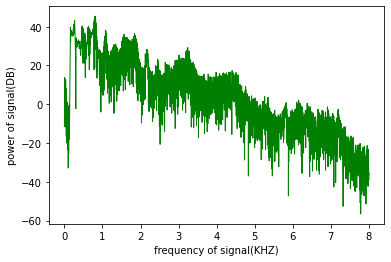

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


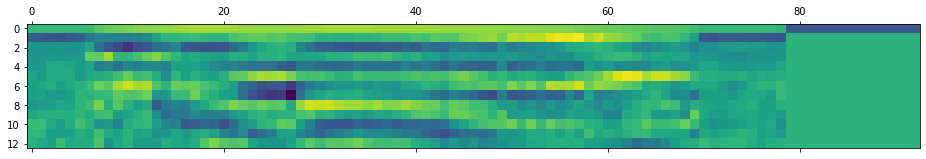

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/en-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


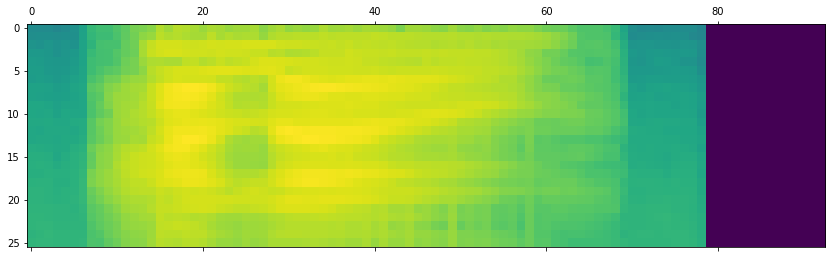

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()

In [ ]:
#hindi

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/hi-translation.wav")


Shape of Signal: (27400,)
Signal Datatype: int16
Signal duration: 1.71 seconds


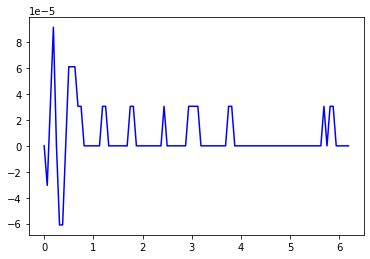

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


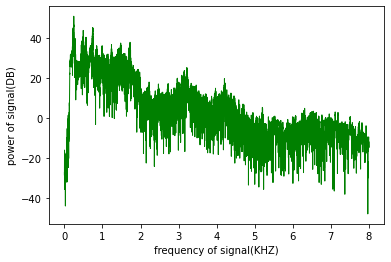

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


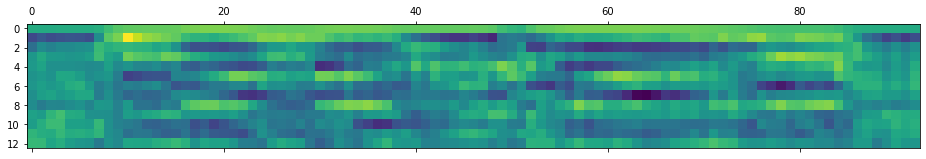

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/hi-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


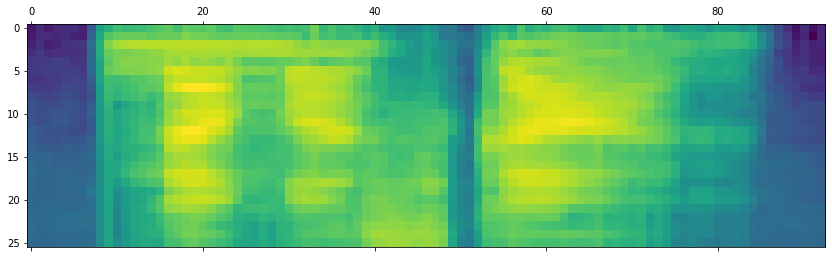

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()

In [ ]:
#italian

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/it-translation.wav")


Shape of Signal: (13200,)
Signal Datatype: int16
Signal duration: 0.82 seconds


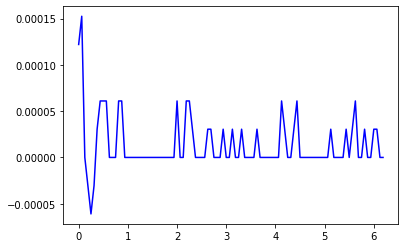

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


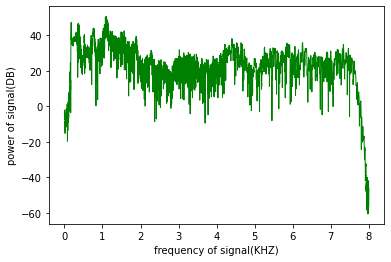

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 81
Individual Feature Length = 13


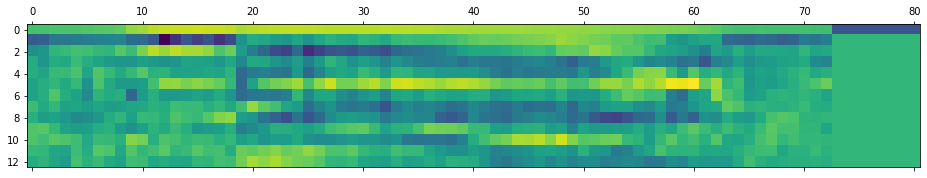

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/it-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 81
Individual Feature Length = 26


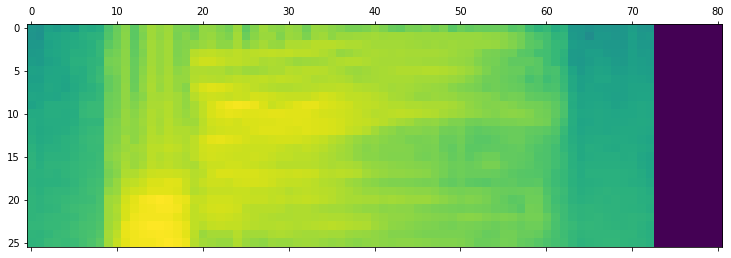

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()

In [ ]:
#portuguese

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/pt-translation.wav")


Shape of Signal: (19400,)
Signal Datatype: int16
Signal duration: 1.21 seconds


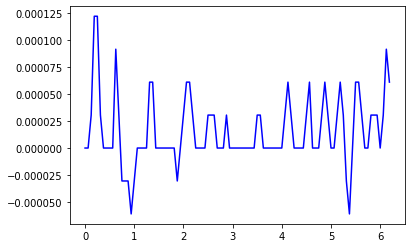

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


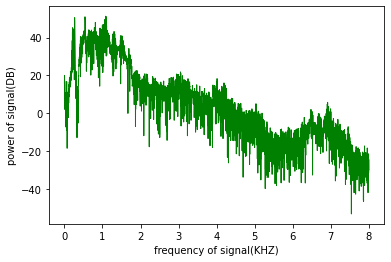

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


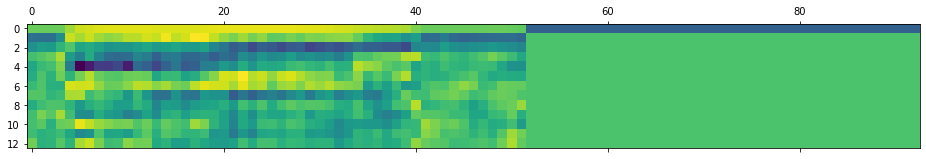

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/pt-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


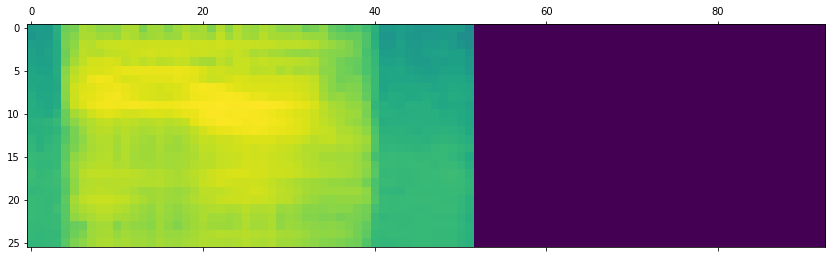

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()

In [ ]:
#chinnese

In [ ]:
freq_sample1, sig_audio1 = wavfile.read("/content/zh-Hans-translation.wav")


Shape of Signal: (17000,)
Signal Datatype: int16
Signal duration: 1.06 seconds


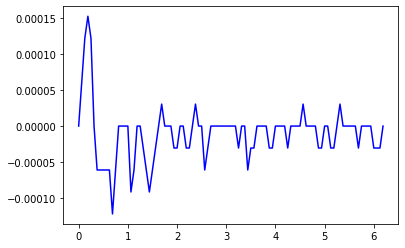

In [ ]:
print('\nShape of Signal:', sig_audio1.shape)
print('Signal Datatype:', sig_audio1.dtype)
print('Signal duration:', round(sig_audio1.shape[0] / float(freq_sample1), 2), 'seconds')
pow_audio_signal1 = sig_audio1 / np.power(2, 15)
pow_audio_signal1 = pow_audio_signal1 [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal1), 1) / float(freq_sample1)
plt.plot(time_axis, pow_audio_signal1, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


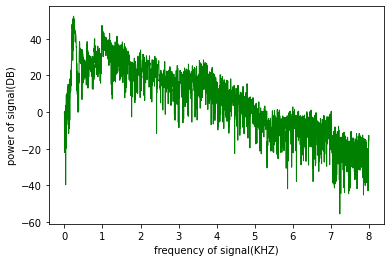

In [ ]:
sig_length1 = len(sig_audio1)
half_length1 = np.ceil((sig_length1 + 1) / 2.0).astype(np.int)
signal_freq1 = np.fft.fft(sig_audio1)
signal_freq1 = abs(signal_freq1[0:half_length1]) / sig_length1
signal_freq1 **= 2
transform_len1 = len(signal_freq1)
if sig_length1 % 2:
  signal_freq1[1:transform_len1] *= 2
else:
  signal_freq1[1:transform_len1-1] *= 2
exp_signal = 10 * np.log10(signal_freq1)
x_axis = np.arange(0, half_length1, 1) * (freq_sample1 / sig_length1) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('frequency of signal(KHZ)')
plt.ylabel('power of signal(DB)')
plt.show()


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


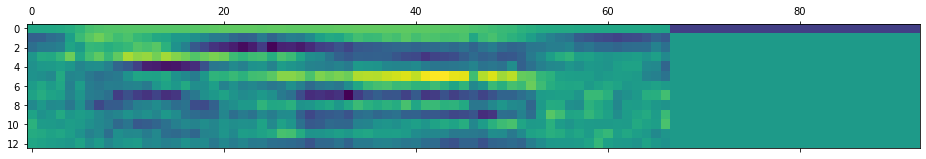

In [ ]:

from python_speech_features import mfcc, logfbank
sampling_freq1, sig_audio1 = wavfile.read("/content/zh-Hans-translation.wav")
sig_audio1 = sig_audio1[:15000]
mfcc_feat1 = mfcc(sig_audio1, sampling_freq1)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat1.shape[0])
print('Individual Feature Length =', mfcc_feat1.shape[1])
mfcc_feat1 = mfcc_feat1.T
plt.matshow(mfcc_feat1)
plt.show()


Filter bank
Window Count = 93
Individual Feature Length = 26


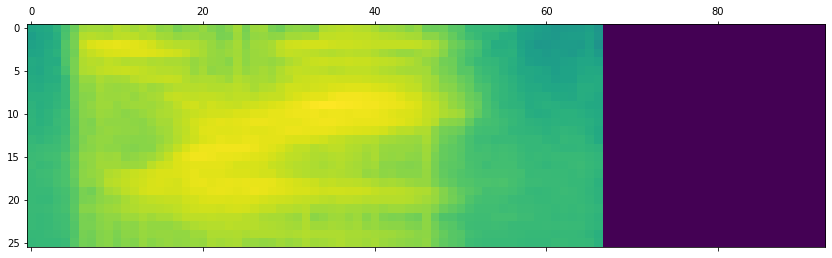

In [ ]:
fb_feat1 = logfbank(sig_audio1, sampling_freq1)
print('\nFilter bank\nWindow Count =', fb_feat1.shape[0])
print('Individual Feature Length =', fb_feat1.shape[1])
fb_feat = fb_feat1.T
plt.matshow(fb_feat)
plt.show()